In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置列名
user_columns = ['user_id', 'gender', 'age', 'occupation', 'zip_code']
movie_columns = ['movie_id', 'title', 'genres']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']

# 读取数据
users = pd.read_csv(r'./ml-1m/users.dat', sep='::', engine='python', names=user_columns, encoding='utf-8')
movies = pd.read_csv(r'./ml-1m/movies.dat', sep='::', engine='python', names=movie_columns, encoding='ISO-8859-1')
ratings = pd.read_csv(r'./ml-1m/ratings.dat', sep='::', engine='python', names=rating_columns, encoding='utf-8')

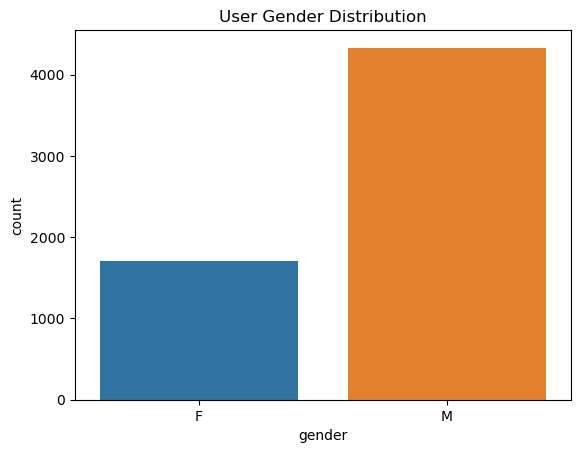

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


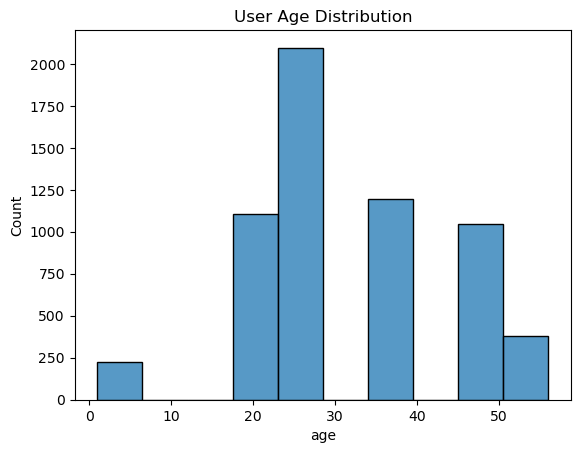

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


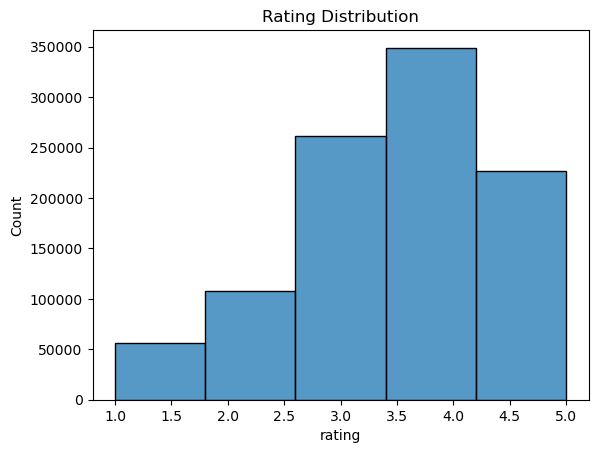

Most Popular Movies:
                                                   title  \
257           Star Wars: Episode IV - A New Hope (1977)   
476                                Jurassic Park (1993)   
585                   Terminator 2: Judgment Day (1991)   
589                    Silence of the Lambs, The (1991)   
1178  Star Wars: Episode V - The Empire Strikes Back...   
1192  Star Wars: Episode VI - Return of the Jedi (1983)   
1250                          Back to the Future (1985)   
1959                         Saving Private Ryan (1998)   
2502                                 Matrix, The (1999)   
2789                             American Beauty (1999)   

                                   genres  
257       Action|Adventure|Fantasy|Sci-Fi  
476               Action|Adventure|Sci-Fi  
585                Action|Sci-Fi|Thriller  
589                        Drama|Thriller  
1178    Action|Adventure|Drama|Sci-Fi|War  
1192  Action|Adventure|Romance|Sci-Fi|War  
1250                

In [2]:
# 用户性别分布
sns.countplot(x='gender', data=users)
plt.title('User Gender Distribution')
plt.show()

# 用户年龄分布
sns.histplot(x='age', data=users, bins=10)
plt.title('User Age Distribution')
plt.show()

# 电影评分分布
sns.histplot(x='rating', data=ratings, bins=5, kde=False)
plt.title('Rating Distribution')
plt.show()

# 最受欢迎的电影
popular_movies = ratings['movie_id'].value_counts().head(10)
popular_movies = popular_movies.index.tolist()
most_popular = movies[movies['movie_id'].isin(popular_movies)]
print("Most Popular Movies:\n", most_popular[['title', 'genres']])

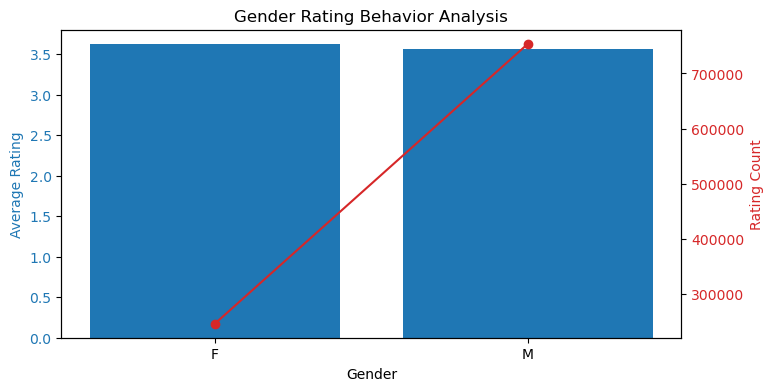

In [3]:
# 合并用户数据和评分数据
user_ratings = pd.merge(ratings, users, on='user_id')

# 计算每个性别的平均评分和评分计数
gender_rating_stats = user_ratings.groupby('gender')['rating'].agg(['mean', 'count'])

# 可视化
fig, ax1 = plt.subplots(figsize=(8, 4))
color = 'tab:blue'
ax1.set_xlabel('Gender')
ax1.set_ylabel('Average Rating', color=color)
ax1.bar(gender_rating_stats.index, gender_rating_stats['mean'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Rating Count', color=color)
ax2.plot(gender_rating_stats.index, gender_rating_stats['count'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Gender Rating Behavior Analysis')
plt.show()

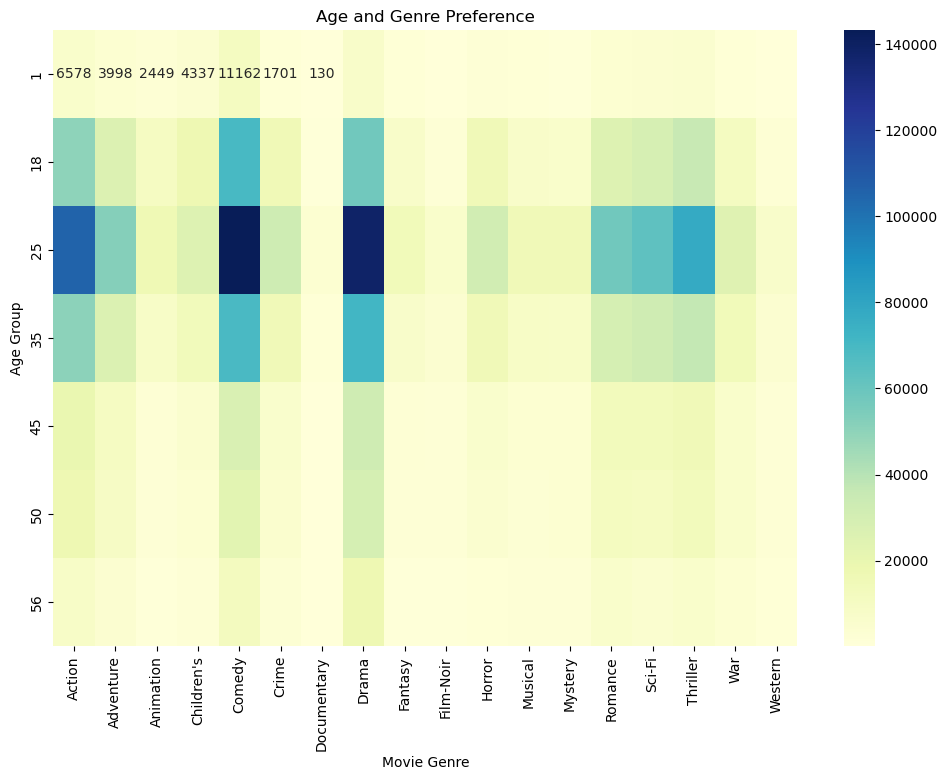

In [4]:
# 创建每个电影的类型标签
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# 将电影数据与评分数据合并
movie_ratings = pd.merge(ratings, movies, on='movie_id')

# 展开genres列以便于分析
movie_ratings_exploded = movie_ratings.explode('genres')

# 合并用户数据
full_data = pd.merge(movie_ratings_exploded, users, on='user_id')

# 统计每个年龄组对每种类型的评分次数
age_genre_preference = full_data.groupby(['age', 'genres']).size().unstack().fillna(0)

# 可视化
plt.figure(figsize=(12, 8))
sns.heatmap(age_genre_preference, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Age and Genre Preference')
plt.xlabel('Movie Genre')
plt.ylabel('Age Group')
plt.show()

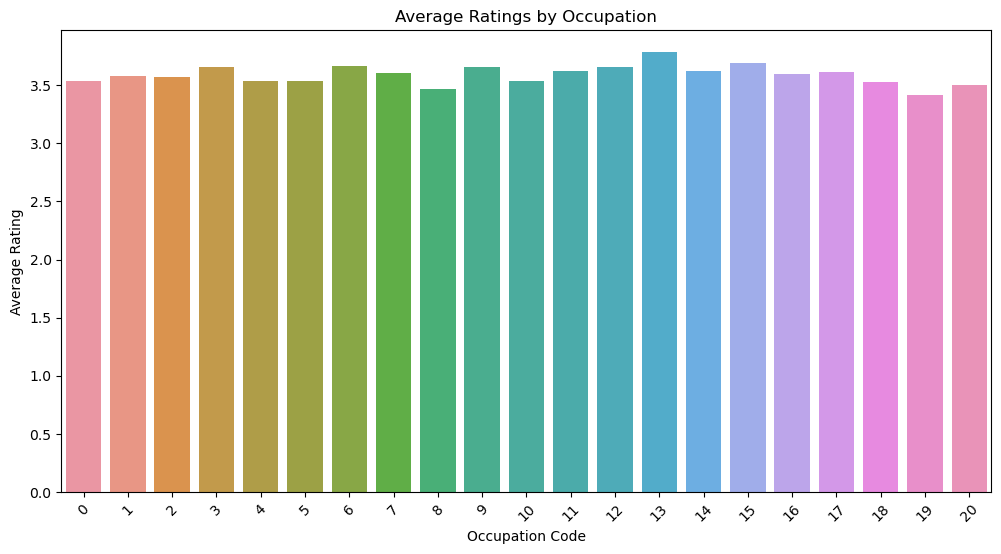

In [5]:
# 计算每个职业的平均评分和评分计数
occupation_rating_stats = user_ratings.groupby('occupation')['rating'].agg(['mean', 'count'])

# 可视化
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_rating_stats.index, y=occupation_rating_stats['mean'])
plt.title('Average Ratings by Occupation')
plt.xlabel('Occupation Code')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [6]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [7]:
users = pd.read_csv(r'./ml-1m/users.dat', sep='::', engine='python', names=user_columns, encoding='utf-8')
movies = pd.read_csv(r'./ml-1m/movies.dat', sep='::', engine='python', names=movie_columns, encoding='ISO-8859-1')
ratings = pd.read_csv(r'./ml-1m/ratings.dat', sep='::', engine='python', names=rating_columns, encoding='utf-8')

In [8]:
# 转换 'genres' 从字符串到列表
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))


In [9]:
# 合并数据集
data = pd.merge(pd.merge(ratings, users), movies)

# 用户特征：评分计数和平均评分
user_rating_stats = ratings.groupby('user_id')['rating'].agg(['count', 'mean']).rename(columns={'count': 'user_rating_count', 'mean': 'user_rating_mean'})
data = data.join(user_rating_stats, on='user_id')

# 电影特征：评分计数和平均评分
movie_rating_stats = ratings.groupby('movie_id')['rating'].agg(['count', 'mean']).rename(columns={'count': 'movie_rating_count', 'mean': 'movie_rating_mean'})
data = data.join(movie_rating_stats, on='movie_id')

# 电影类型的One-hot编码
movies = pd.concat([movies.drop('genres', axis=1), movies['genres'].apply(lambda x: pd.Series(1, index=x)).fillna(0)], axis=1)
data = pd.merge(data, movies, on='movie_id')

# 用户对电影类型的偏好评分
def genre_rating(row, genre_ratings):
    avg_ratings = [genre_ratings.get((row['user_id'], genre), np.nan) for genre in row['genres']]
    return np.nanmean(avg_ratings)

# 创建每个用户对每个电影类型的平均评分字典
genre_ratings = data.explode('genres').groupby(['user_id', 'genres'])['rating'].mean().to_dict()
data['user_genre_pref'] = data.apply(lambda row: genre_rating(row, genre_ratings), axis=1)


In [10]:
data.to_csv('processed_data.csv', index=False)


In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [12]:
# 创建训练集的评分矩阵
train_matrix = train_data.pivot_table(values='rating', index='movie_id', columns='user_id', fill_value=0)

# 创建测试集的评分矩阵
test_matrix = test_data.pivot_table(values='rating', index='movie_id', columns='user_id', fill_value=0)


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 计算物品之间的余弦相似度
item_similarity = cosine_similarity(train_matrix)
np.fill_diagonal(item_similarity, 0)  # 将对角线设为0，因为自身与自身的相似度不考虑
item_similarity_df = pd.DataFrame(item_similarity, index=train_matrix.index, columns=train_matrix.index)


In [14]:
def predict_ratings(user_id, movie_id):
    if movie_id not in item_similarity_df.index:
        return 0  # 电影ID不在训练集中，无法预测
    # 取出目标电影的相似度
    sim_scores = item_similarity_df.loc[movie_id]
    # 用户的评分
    user_ratings = train_matrix.loc[:, user_id]
    # 计算预测评分
    weighted_scores = np.dot(sim_scores, user_ratings)
    sum_sim_scores = np.sum(sim_scores)
    if sum_sim_scores == 0:
        return 0  # 处理除以零的情况
    else:
        return weighted_scores / sum_sim_scores


In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# 生成测试集上的预测评分
test_data['predicted_rating'] = test_data.apply(lambda row: predict_ratings(row['user_id'], row['movie_id']), axis=1)

# 计算RMSE
actual = test_data['rating']
predicted = test_data['predicted_rating']
rmse_score = sqrt(mean_squared_error(actual, predicted))
print('RMSE:', rmse_score)

# 计算MAE
from sklearn.metrics import mean_absolute_error
mae_score = mean_absolute_error(actual, predicted)
print('MAE:', mae_score)


RMSE: 3.2843960377751253
MAE: 3.0656923901999567


In [16]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# 加载数据
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['user_id', 'movie_id', 'rating']], reader)

# 使用SVD
model = SVD()
trainset = data.build_full_trainset()
model.fit(trainset)

# 评估模型
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8741  0.8730  0.8723  0.8730  0.8760  0.8737  0.0013  
MAE (testset)     0.6861  0.6851  0.6851  0.6856  0.6881  0.6860  0.0011  
Fit time          7.31    7.39    7.46    7.48    7.84    7.49    0.18    
Test time         1.04    1.03    1.02    1.04    1.19    1.06    0.06    


{'test_rmse': array([0.874131  , 0.87300927, 0.87225931, 0.87299051, 0.87595353]),
 'test_mae': array([0.68608473, 0.68505114, 0.68512541, 0.68556901, 0.68809939]),
 'fit_time': (7.3065197467803955,
  7.389913558959961,
  7.459580898284912,
  7.477057218551636,
  7.841743230819702),
 'test_time': (1.0353350639343262,
  1.0303452014923096,
  1.0173287391662598,
  1.0401437282562256,
  1.1897897720336914)}

In [17]:
import pandas as pd

# 加载数据
users = pd.read_csv(r'./ml-1m/users.dat', sep='::', header=None, engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
movies = pd.read_csv(r'./ml-1m/movies.dat', sep='::', header=None, engine='python', names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')
ratings = pd.read_csv(r'./ml-1m/ratings.dat', sep='::', header=None, engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# 合并数据
data = pd.merge(pd.merge(ratings, users), movies)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 为每个电影的类型创建TF-IDF矩阵
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['Genres'])

# 计算电影之间的余弦相似度
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# 创建一个电影标题到索引的映射
indices = pd.Series(movies.index, index=movies['Title']).drop_duplicates()

def content_based_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['Title'].iloc[movie_indices]


In [19]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# 使用Surprise库加载数据
reader = Reader(line_format='user item rating timestamp', sep='::')
data = Dataset.load_from_df(ratings[['UserID', 'MovieID', 'Rating']], reader)

# 使用SVD算法进行协同过滤
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# 训练模型
trainset = data.build_full_trainset()
svd.fit(trainset)

# 为用户进行推荐
def collaborative_filtering_recommendations(user_id, n=10):
    user_ratings = ratings[ratings['UserID'] == user_id]
    user_watched = user_ratings['MovieID'].tolist()
    movie_ids = movies['MovieID'].tolist()
    recommendations = []
    for movie_id in movie_ids:
        if movie_id not in user_watched:
            est = svd.predict(user_id, movie_id).est
            recommendations.append((movie_id, est))
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
    top_n_recommendations = [movies[movies['MovieID'] == movie_id]['Title'].values[0] for movie_id, _ in recommendations[:n]]
    return top_n_recommendations


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8761  0.8748  0.8726  0.8733  0.8747  0.8743  0.0012  
MAE (testset)     0.6876  0.6872  0.6858  0.6855  0.6870  0.6866  0.0008  
Fit time          6.18    6.38    6.94    6.48    6.35    6.46    0.26    
Test time         0.94    1.49    1.26    1.17    1.47    1.27    0.20    


In [20]:
def hybrid_recommendations(user_id, title, alpha=0.5):
    content_recs = content_based_recommendations(title)
    collab_recs = collaborative_filtering_recommendations(user_id)
    
    # 合并推荐结果
    hybrid_recs = pd.Series(content_recs).append(pd.Series(collab_recs)).value_counts()
    hybrid_recs = hybrid_recs[hybrid_recs > 1]  # 取同时出现在两种推荐中的电影
    
    if len(hybrid_recs) < 10:
        hybrid_recs = pd.Series(content_recs).append(pd.Series(collab_recs)).value_counts()
    
    return hybrid_recs.index[:10].tolist()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from collections import defaultdict

# 将数据集分割为训练集和测试集
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

def get_precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
    
    return precisions, recalls

# 使用训练集训练模型
trainset = data.build_full_trainset()
svd.fit(trainset)

# 在测试集上进行预测
testset = data.construct_testset(test.values)
predictions = svd.test(testset)

precisions, recalls = get_precision_recall_at_k(predictions, k=10, threshold=3.5)

# 计算平均精度和召回率
mean_precision = sum(prec for prec in precisions.values()) / len(precisions)
mean_recall = sum(rec for rec in recalls.values()) / len(recalls)

print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')


Mean Precision: 0.902088558179158
Mean Recall: 0.6258601105929433


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# 加载数据
ratings = pd.read_csv('./ml-1m/ratings.dat', sep='::', header=None, engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# 创建电影ID的映射
unique_movie_ids = ratings['MovieID'].unique()
movie_id_map = {old: new for new, old in enumerate(unique_movie_ids)}

# 更新ratings中的电影ID
ratings['MovieID'] = ratings['MovieID'].map(movie_id_map)

num_users = ratings['UserID'].nunique()
num_movies = len(unique_movie_ids)

# 创建用户-物品评分矩阵
ratings_matrix = np.zeros((num_users, num_movies))
for row in ratings.itertuples():
    ratings_matrix[row.UserID - 1, row.MovieID] = row.Rating

# 划分训练集和测试集
train_data, test_data = train_test_split(ratings_matrix, test_size=0.2, random_state=42)

# 自定义数据集类
class RatingsDataset(Dataset):
    def __init__(self, data):
        self.data = torch.FloatTensor(data)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 创建数据加载器
batch_size = 256
train_dataset = RatingsDataset(train_data)
test_dataset = RatingsDataset(test_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [23]:
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, num_movies):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_movies, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, num_movies),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 初始化模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder(num_movies).to(device)


In [26]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss /= len(train_loader.dataset)
    
    print(f"Epoch {epoch+1}, Loss: {train_loss:.4f}")


Epoch 1, Loss: 0.4564
Epoch 2, Loss: 0.4522
Epoch 3, Loss: 0.4512
Epoch 4, Loss: 0.4507
Epoch 5, Loss: 0.4503
Epoch 6, Loss: 0.4500
Epoch 7, Loss: 0.4498
Epoch 8, Loss: 0.4495
Epoch 9, Loss: 0.4493
Epoch 10, Loss: 0.4490
Epoch 11, Loss: 0.4487
Epoch 12, Loss: 0.4486
Epoch 13, Loss: 0.4483
Epoch 14, Loss: 0.4480
Epoch 15, Loss: 0.4477
Epoch 16, Loss: 0.4475
Epoch 17, Loss: 0.4472
Epoch 18, Loss: 0.4470
Epoch 19, Loss: 0.4468
Epoch 20, Loss: 0.4464
Epoch 21, Loss: 0.4461
Epoch 22, Loss: 0.4459
Epoch 23, Loss: 0.4457
Epoch 24, Loss: 0.4455
Epoch 25, Loss: 0.4453
Epoch 26, Loss: 0.4452
Epoch 27, Loss: 0.4450
Epoch 28, Loss: 0.4450
Epoch 29, Loss: 0.4447
Epoch 30, Loss: 0.4444
Epoch 31, Loss: 0.4441
Epoch 32, Loss: 0.4438
Epoch 33, Loss: 0.4435
Epoch 34, Loss: 0.4434
Epoch 35, Loss: 0.4433
Epoch 36, Loss: 0.4431
Epoch 37, Loss: 0.4427
Epoch 38, Loss: 0.4425
Epoch 39, Loss: 0.4425
Epoch 40, Loss: 0.4423
Epoch 41, Loss: 0.4421
Epoch 42, Loss: 0.4418
Epoch 43, Loss: 0.4416
Epoch 44, Loss: 0.44

In [25]:
model.eval()
test_loss = 0
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        output = model(data)
        loss = criterion(output, data)
        test_loss += loss.item() * data.size(0)
test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")


Test Loss: 0.4444


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# 加载数据
# ratings = pd.read_csv('ratings.dat', sep='::', header=None, engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# 创建电影ID和用户ID的映射
unique_movie_ids = ratings['MovieID'].unique()
unique_user_ids = ratings['UserID'].unique()

movie_id_map = {old: new for new, old in enumerate(unique_movie_ids)}
user_id_map = {old: new for new, old in enumerate(unique_user_ids)}

ratings['MovieID'] = ratings['MovieID'].map(movie_id_map)
ratings['UserID'] = ratings['UserID'].map(user_id_map)

num_users = ratings['UserID'].nunique()
num_movies = ratings['MovieID'].nunique()

# 划分训练集和测试集
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# 自定义数据集类
class RatingsDataset(Dataset):
    def __init__(self, data):
        self.users = torch.LongTensor(data['UserID'].values)
        self.movies = torch.LongTensor(data['MovieID'].values)
        self.ratings = torch.FloatTensor(data['Rating'].values)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.users[idx], self.movies[idx], self.ratings[idx]

# 创建数据加载器
batch_size = 256
train_dataset = RatingsDataset(train_data)
test_dataset = RatingsDataset(test_data)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [29]:
import torch.nn as nn
import torch.optim as optim

class NCF(nn.Module):
    def __init__(self, num_users, num_movies, embedding_size=32):
        super(NCF, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.movie_embedding = nn.Embedding(num_movies, embedding_size)
        self.fc1 = nn.Linear(embedding_size * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, user_ids, movie_ids):
        user_embeds = self.user_embedding(user_ids)
        movie_embeds = self.movie_embedding(movie_ids)
        x = torch.cat([user_embeds, movie_embeds], dim=-1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.output(x))
        return x.squeeze()

# 初始化模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NCF(num_users, num_movies).to(device)


In [30]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for user_ids, movie_ids, ratings in train_loader:
        user_ids = user_ids.to(device)
        movie_ids = movie_ids.to(device)
        ratings = ratings.to(device)

        optimizer.zero_grad()
        outputs = model(user_ids, movie_ids)
        loss = criterion(outputs, ratings)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * ratings.size(0)
    train_loss /= len(train_loader.dataset)
    
    print(f"Epoch {epoch+1}, Loss: {train_loss:.4f}")


Epoch 1, Loss: 7.9301
Epoch 2, Loss: 7.9098
Epoch 3, Loss: 7.9098
Epoch 4, Loss: 7.9098
Epoch 5, Loss: 7.9098
Epoch 6, Loss: 7.9098
Epoch 7, Loss: 7.9098
Epoch 8, Loss: 7.9098
Epoch 9, Loss: 7.9098
Epoch 10, Loss: 7.9098
Epoch 11, Loss: 7.9098
Epoch 12, Loss: 7.9098
Epoch 13, Loss: 7.9098
Epoch 14, Loss: 7.9098
Epoch 15, Loss: 7.9098
Epoch 16, Loss: 7.9098
Epoch 17, Loss: 7.9098
Epoch 18, Loss: 7.9098
Epoch 19, Loss: 7.9098
Epoch 20, Loss: 7.9098


In [31]:
model.eval()
test_loss = 0
with torch.no_grad():
    for user_ids, movie_ids, ratings in test_loader:
        user_ids = user_ids.to(device)
        movie_ids = movie_ids.to(device)
        ratings = ratings.to(device)

        outputs = model(user_ids, movie_ids)
        loss = criterion(outputs, ratings)
        test_loss += loss.item() * ratings.size(0)
test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")


Test Loss: 7.9228
